# Abalone Case Study
### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Import Basic Libarary.

In [2]:
df_abalone=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Import Data set from Gethub and display the Data.Observation is that there are 4177 columns and 9 columns.

In [3]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


More information has been displayed there are no any Null value is present in dataset with 7 columns dtype is float64 , 1 columns dtype is int64 and 1 columns dtype have object.

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE.fit(df_abalone['Sex'])
df_abalone['Sex']=LE.fit_transform(df_abalone['Sex'])
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Object dtype Sex columns  has been converted into int.

In [5]:
df_abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per Observation is columns some outlier is present in dataset

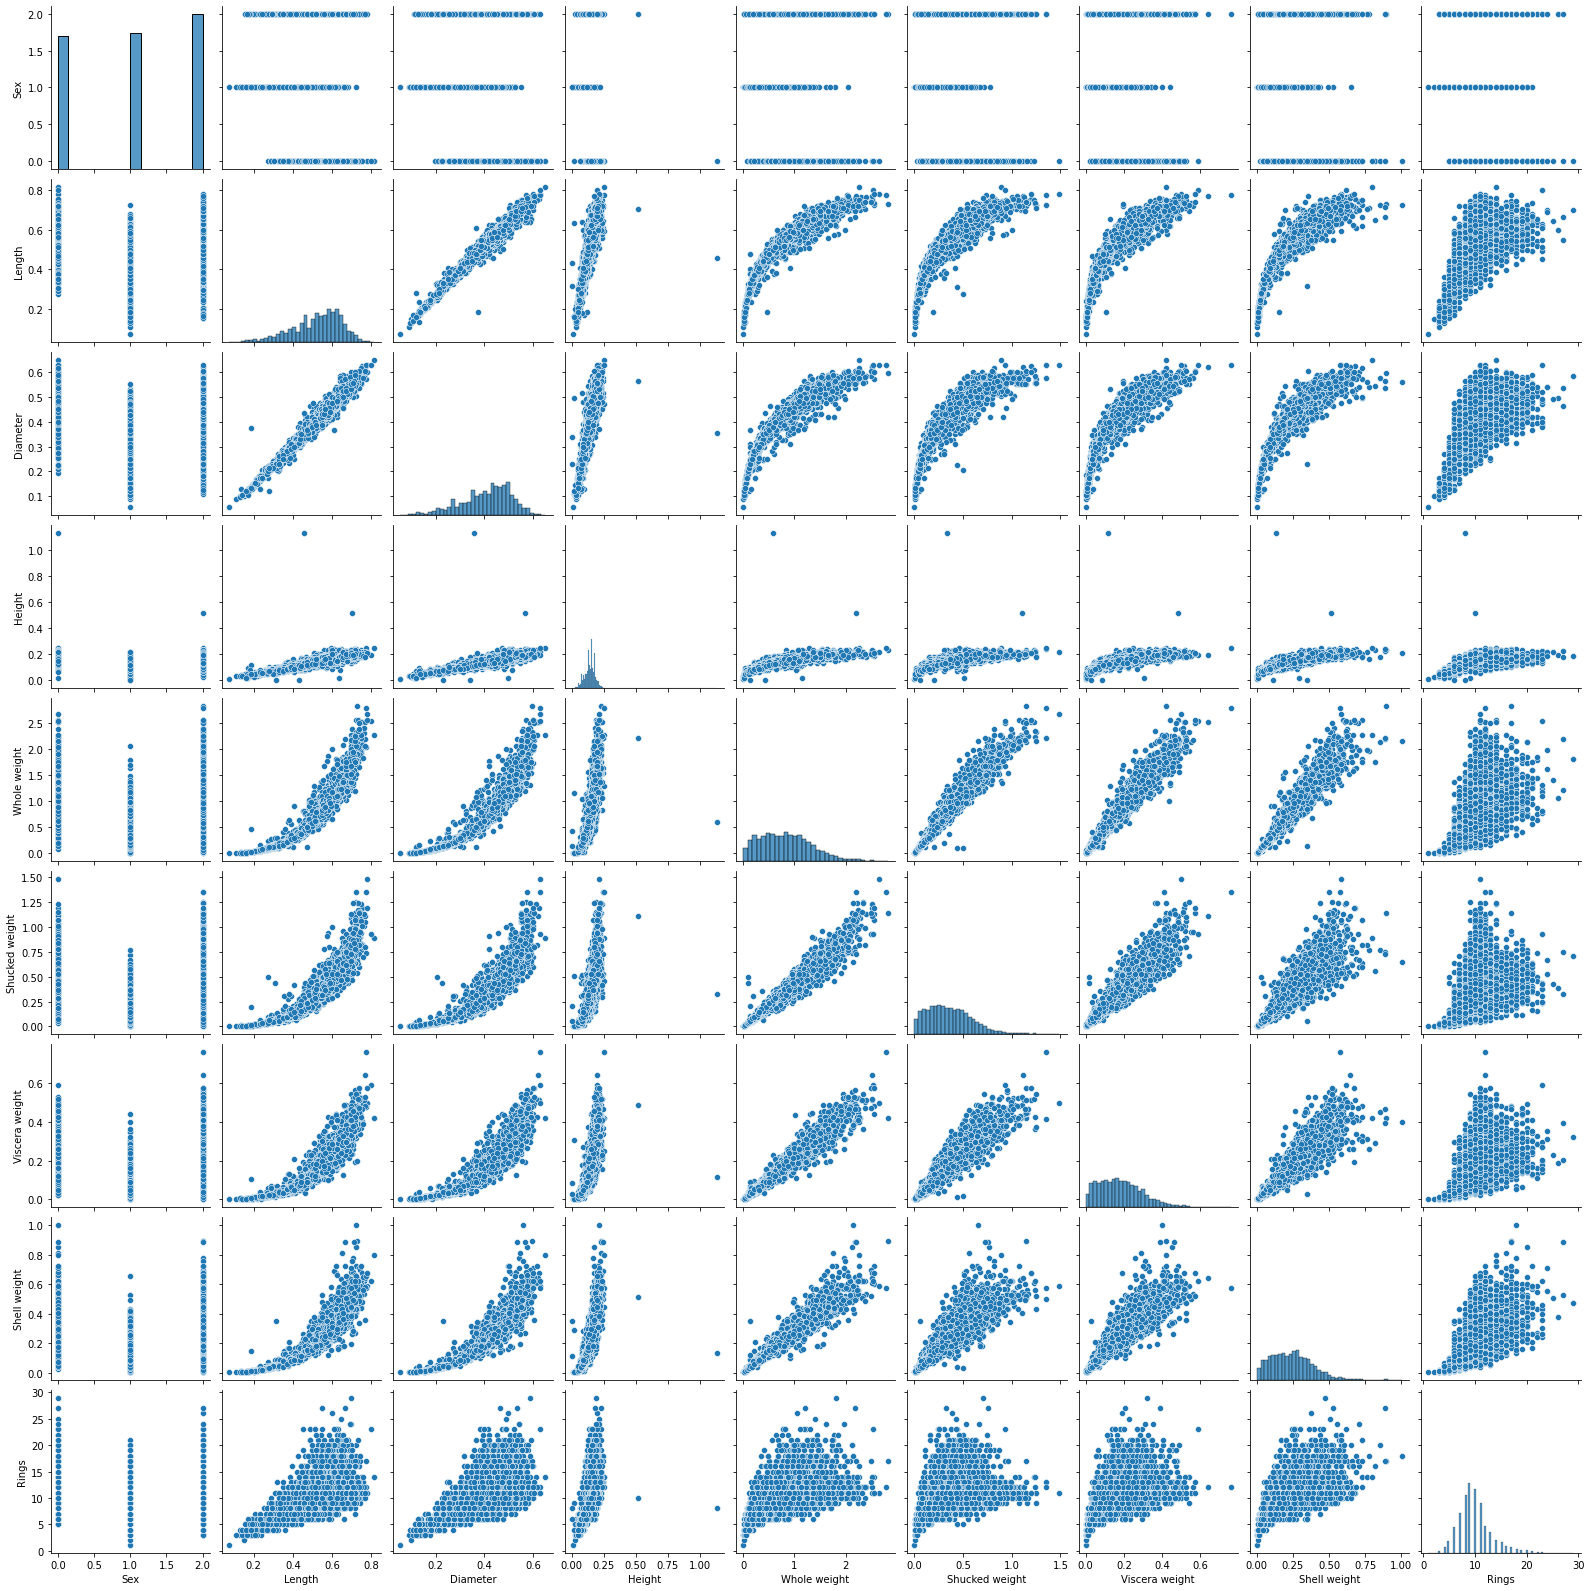

In [6]:
sns.pairplot(df_abalone)

In [7]:
from scipy.stats import zscore
z_score=abs(zscore(df_abalone))
print(df_abalone.shape)
df_abalone_final=df_abalone.loc[(z_score<3).all(axis=1)]
print(df_abalone_final.shape)

(4177, 9)
(4027, 9)


Outlier has been removed(1.1% data has been removed)

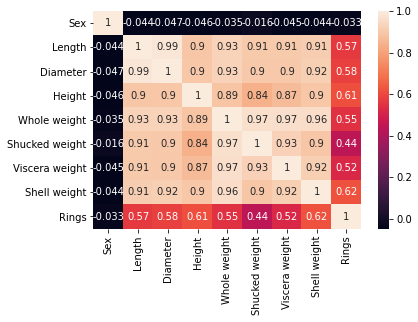

In [8]:
sns.heatmap(df_abalone_final.corr(),annot=True)


Aboveb observations mostly features are highly correleted to eachother.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f448fe7a310>,
      dtype=object)

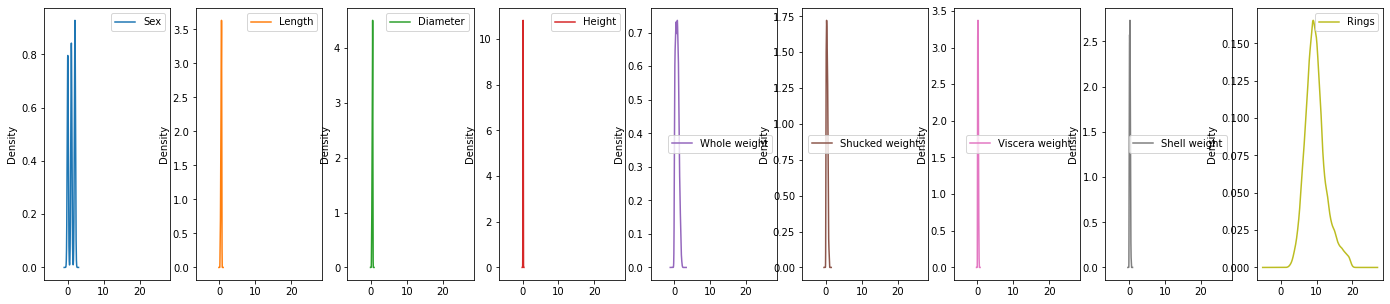

In [9]:
df_abalone_final.plot(kind='density',subplots=True,layout=(1,9),figsize=(24,5))

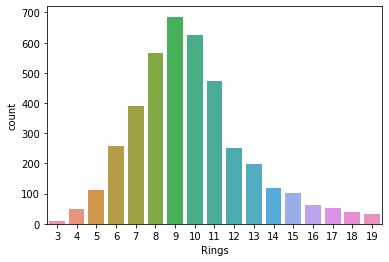

In [26]:
sns.countplot(df_abalone_final['Rings'])

In [10]:
df_abalone_final.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

From above output it is clear that skewness exist

In [11]:
df_x=df_abalone_final.drop(columns=["Rings"])
y=df_abalone_final[["Rings"]]

before treating skewnees lets divide the dataset into input and output

In [12]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])
df_x.skew()

Sex              -0.094886
Length           -0.119420
Diameter         -0.078925
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

skewness has been removed.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Scalled all columns in same scale.

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [15]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,df_x,np.log1p(y))

r2 score corresponding to  42  is  0.2656730770988175
r2 score corresponding to  43  is  0.19473565506935475
r2 score corresponding to  44  is  0.18045787972865734
r2 score corresponding to  45  is  0.32668799826269523
r2 score corresponding to  46  is  0.23667491470774005
r2 score corresponding to  47  is  0.3117777755399106
r2 score corresponding to  48  is  0.14408711324113554
r2 score corresponding to  49  is  0.2703659096547175
r2 score corresponding to  50  is  0.2666875335385652
r2 score corresponding to  51  is  0.35401820369603454
r2 score corresponding to  52  is  0.2444662115601065
r2 score corresponding to  53  is  0.185020559514126
r2 score corresponding to  54  is  0.2503455956734585
r2 score corresponding to  55  is  0.20961462852768553
r2 score corresponding to  56  is  0.15923422621611028
r2 score corresponding to  57  is  0.2945923223907375
r2 score corresponding to  58  is  0.2951790709713191
r2 score corresponding to  59  is  0.2508383909590435
r2 score correspondin

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(df_x, np.log1p(y))
clf.best_params_

{'n_estimators': 500}

In [17]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,df_x,np.log1p(y))

r2 score corresponding to  42  is  0.612831674649505
r2 score corresponding to  43  is  0.6017542546152996
r2 score corresponding to  44  is  0.6231389118039394
r2 score corresponding to  45  is  0.6678875755843642
r2 score corresponding to  46  is  0.6084662458953171
r2 score corresponding to  47  is  0.6341165681137526
r2 score corresponding to  48  is  0.5693063082951132
r2 score corresponding to  49  is  0.6113630032413686
r2 score corresponding to  50  is  0.6199848486296654
r2 score corresponding to  51  is  0.624375506275475
r2 score corresponding to  52  is  0.597838493416684
r2 score corresponding to  53  is  0.5456599239145667
r2 score corresponding to  54  is  0.5830621294680285
r2 score corresponding to  55  is  0.5879572813717702
r2 score corresponding to  56  is  0.5813657882915908
r2 score corresponding to  57  is  0.6528549052867878
r2 score corresponding to  58  is  0.6285023678217174
r2 score corresponding to  59  is  0.6213882196663069
r2 score corresponding to  60  

In [18]:
#Lets check the mean r2_score with random forest
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,df_x,np.log1p(y),cv=10,scoring="r2").mean()

0.5351191044411159

In [19]:
#Lets use KNN regressor but we will find the otimal value of n_neigbors using grid search
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=10)
clf.fit(df_x, np.log1p(y))
clf.best_params_

{'n_neighbors': 18}

In [20]:
#Lets use n_neighbors as found above and use maxr2_score function
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,df_x,np.log1p(y))
#KNN is giving same r2 score as rando forest

r2 score corresponding to  42  is  0.5865305965635688
r2 score corresponding to  43  is  0.5953923171733928
r2 score corresponding to  44  is  0.6111923712549794
r2 score corresponding to  45  is  0.653161273211061
r2 score corresponding to  46  is  0.6188423435785884
r2 score corresponding to  47  is  0.5948999758484459
r2 score corresponding to  48  is  0.5601206302329579
r2 score corresponding to  49  is  0.6030893291436832
r2 score corresponding to  50  is  0.6120281962461384
r2 score corresponding to  51  is  0.611795121935651
r2 score corresponding to  52  is  0.59021935582322
r2 score corresponding to  53  is  0.5555635310919014
r2 score corresponding to  54  is  0.577392249866705
r2 score corresponding to  55  is  0.5774317086012849
r2 score corresponding to  56  is  0.577749409165727
r2 score corresponding to  57  is  0.6330155276282041
r2 score corresponding to  58  is  0.6273591307279329
r2 score corresponding to  59  is  0.6355790696340164
r2 score corresponding to  60  is 

In [21]:

#Lets find meean r2 score using cross_val score function
cross_val_score(knr,df_x,np.log1p(y),cv=10,scoring="r2").mean()
#Here mean r2 score is better than random forest regressor

0.5402589811564344

In [22]:
#Lets use KNN regressor and save it as our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
y_train=np.log1p(y_train)

In [23]:
knr=KNeighborsRegressor(n_neighbors=19)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [24]:
#Lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,np.expm1(y_pred))))
print("r2_score is: ",r2_score(y_test,np.expm1(y_pred)) )

RMSE is:  1.968736684768247
r2_score is:  0.5525282583622325


In [25]:

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knr, 'abalone_knn.pkl')

['abalone_knn.pkl']